In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Math Formula 
from math import radians, cos, sin, asin, sqrt
from scipy.stats import f_oneway

# geocode
import reverse_geocode

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine learning and data preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, f_regression, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error, r2_score

# Machine learning models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

# Configuration and display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

# Apply a specific style for matplotlib plots
plt.style.use('ggplot')

import joblib

In [2]:
df= pd.read_csv('Auto Sales data.csv')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70000,2,2871.00000,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35000,5,2765.90000,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74000,2,3884.34000,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26000,6,3746.70000,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66000,1,3479.76000,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [6]:
duplicates = df[df.duplicated()]

print("Duplicate rows in the DataFrame:")
print(duplicates)

Duplicate rows in the DataFrame:
Empty DataFrame
Columns: [ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, DAYS_SINCE_LASTORDER, STATUS, PRODUCTLINE, MSRP, PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, CITY, POSTALCODE, COUNTRY, CONTACTLASTNAME, CONTACTFIRSTNAME, DEALSIZE]
Index: []


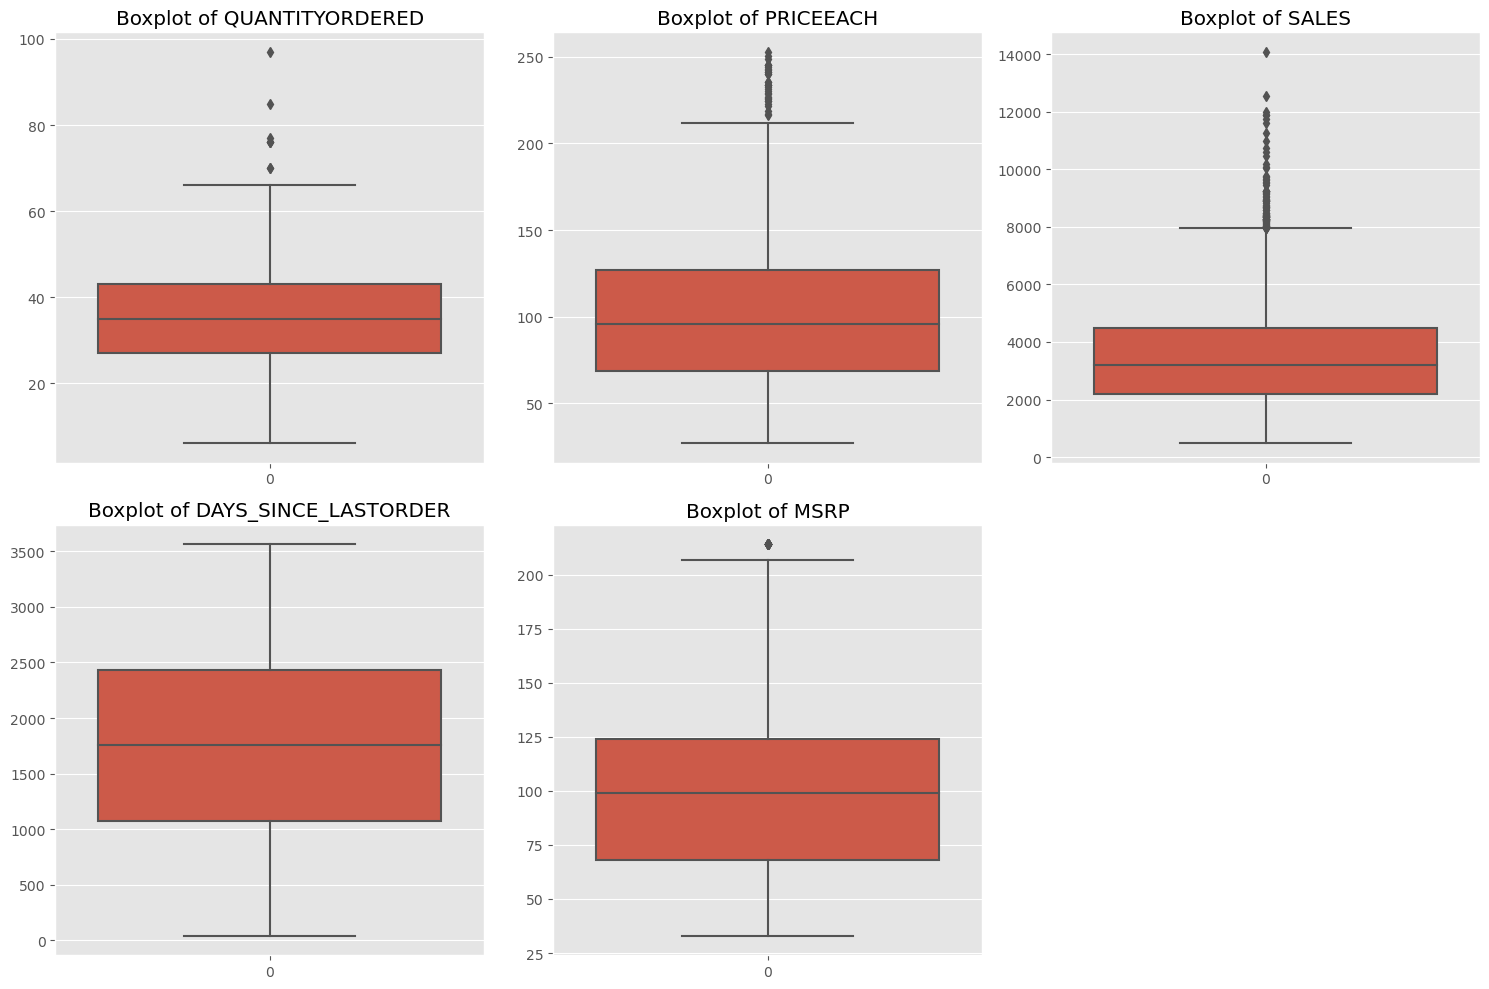

In [7]:
# List of numeric columns to check for outliers
numeric_columns = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']

# Plot the distributions and boxplots for numeric columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [8]:
# Define a function to calculate IQR and filter out outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
cleaned_data = remove_outliers(df, numeric_columns)

# Check the shape of the dataset before and after removing outliers
original_shape = df.shape
cleaned_shape = cleaned_data.shape

original_shape, cleaned_shape


((2747, 20), (2618, 20))

/Users/andi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

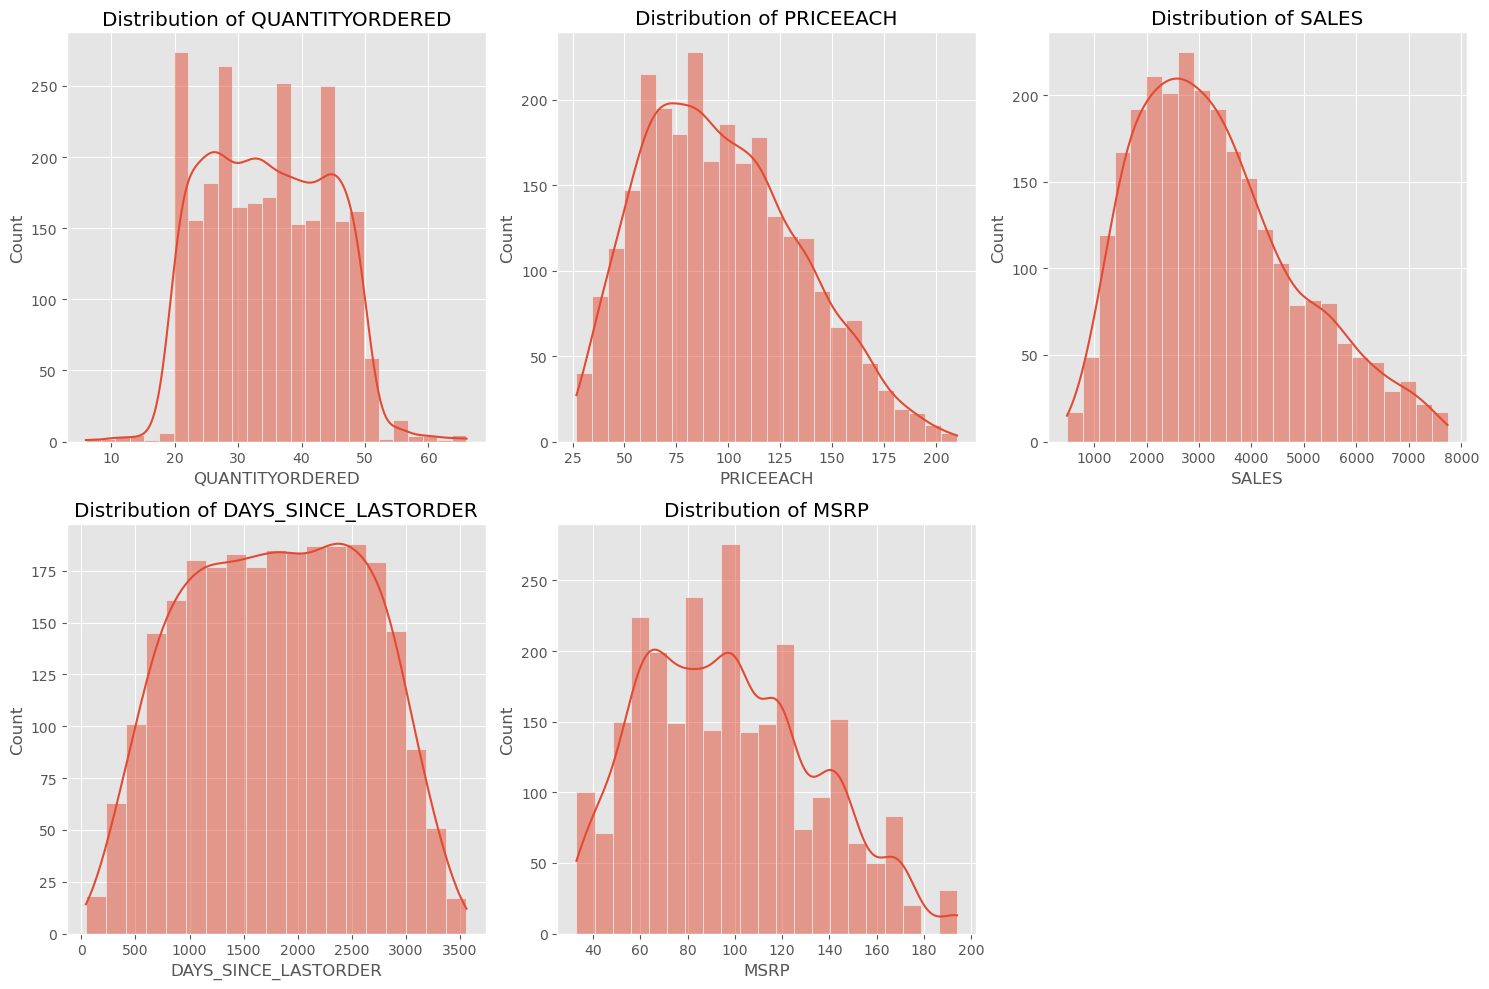

,QUANTITYORDERED,PRICEEACH,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2618.00000,2618.00000,2618.00000,2618.00000,2618.00000
mean,34.67685,96.94075,3340.97138,1800.51681,97.18602
std,9.34661,37.32581,1535.88065,803.19521,36.29886
min,6.00000,26.88000,482.13000,42.00000,33.00000
25%,27.00000,67.52750,2166.41000,1140.50000,68.00000
50%,34.00000,93.02500,3105.93500,1808.50000,96.00000
75%,43.00000,122.17000,4257.91000,2459.75000,121.00000
max,66.00000,210.14000,7737.93000,3562.00000,194.00000


In [9]:
# Summary statistics for numeric columns
summary_stats = cleaned_data[numeric_columns].describe()

# Plot the distributions for numeric columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(cleaned_data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

summary_stats


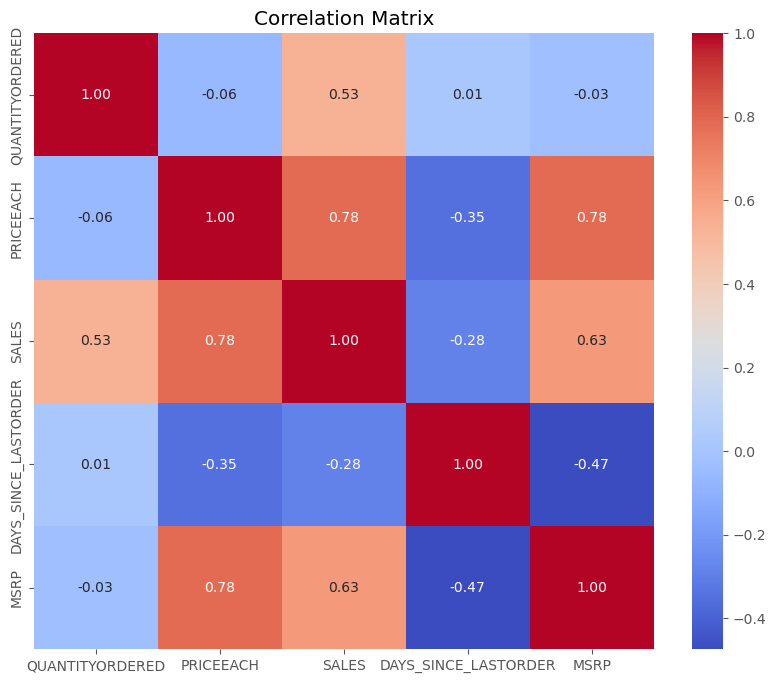

In [10]:
# Correlation matrix
correlation_matrix = cleaned_data[numeric_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Convert ORDERDATE to datetime format
cleaned_data['ORDERDATE'] = pd.to_datetime(cleaned_data['ORDERDATE'], format='%d/%m/%Y')

# Calculate the latest order date to determine recency
latest_order_date = cleaned_data['ORDERDATE'].max()

# Calculate RFM metrics for each customer
rfm = cleaned_data.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (latest_order_date - x.max()).days,  # Recency
    'ORDERNUMBER': 'count',                                     # Frequency
    'SALES': 'sum'                                              # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CUSTOMERNAME', 'Recency', 'Frequency', 'Monetary']

# Display the first few rows of the RFM dataframe
rfm.head()


,CUSTOMERNAME,Recency,Frequency,Monetary
0,"AV Stores, Co.",196,50,151237.05000
1,Alpha Cognac,64,19,62156.83000
2,Amica Models & Co.,265,23,69437.88000
3,"Anna's Decorations, Ltd",83,43,134764.72000
4,Atelier graphique,188,7,24179.96000


In [12]:
# Function to assign RFM scores
def assign_rfm_scores(df):
    rfm_scores = df.copy()
    
    rfm_scores['R_Score'] = pd.qcut(rfm_scores['Recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm_scores['F_Score'] = pd.qcut(rfm_scores['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    rfm_scores['M_Score'] = pd.qcut(rfm_scores['Monetary'], 5, labels=[1, 2, 3, 4, 5])
    
    rfm_scores['RFM_Score'] = rfm_scores['R_Score'].astype(str) + rfm_scores['F_Score'].astype(str) + rfm_scores['M_Score'].astype(str)
    
    return rfm_scores

# Assign RFM scores
rfm_scores = assign_rfm_scores(rfm)

# Display the first few rows of the RFM scores dataframe
rfm_scores.head()


,CUSTOMERNAME,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,"AV Stores, Co.",196,50,151237.05000,3,5,5,355
1,Alpha Cognac,64,19,62156.83000,4,2,2,422
2,Amica Models & Co.,265,23,69437.88000,1,3,2,132
3,"Anna's Decorations, Ltd",83,43,134764.72000,4,5,5,455
4,Atelier graphique,188,7,24179.96000,3,1,1,311


In [13]:
# Segment customers based on RFM score
def segment_customers(df):
    df['RFM_Segment'] = df['RFM_Score'].apply(
        lambda x: 'Champions' if x[0] == '1' and x[1] in ['4', '5'] and x[2] in ['4', '5'] else
                  'Loyal' if x[0] == '2' and x[1] in ['3', '4', '5'] and x[2] in ['3', '4', '5'] else
                  'Potential' if x[0] in ['2', '3'] and x[1] in ['2', '3'] and x[2] in ['2', '3'] else
                  'At Risk' if x[0] in ['4', '5'] and x[1] in ['1', '2'] and x[2] in ['1', '2'] else
                  'Hibernating' if x[0] == '5' and x[1] == '1' and x[2] == '1' else
                  'Others'
    )
    return df

# Assign segments
rfm_segments = segment_customers(rfm_scores)

# Display the distribution of customer segments
segment_distribution = rfm_segments['RFM_Segment'].value_counts()
segment_distribution


RFM_Segment
Others       53
At Risk      11
Loyal        11
Potential    11
Champions     3
Name: count, dtype: int64

In [14]:
# Calculate average RFM values for each segment
segment_analysis = rfm_segments.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

segment_analysis


,RFM_Segment,Recency,Frequency,Monetary
0,At Risk,80.36364,15.81818,51252.79091
1,Champions,334.00000,32.33333,113115.92333
2,Loyal,214.36364,30.63636,102104.93273
3,Others,181.35849,33.50943,111695.78208
4,Potential,193.54545,21.27273,72773.08182


In [15]:
# Calculate the average purchase value
rfm_segments['AveragePurchaseValue'] = rfm_segments['Monetary'] / rfm_segments['Frequency']

# Calculate the purchase frequency
purchase_frequency = rfm_segments['Frequency'].sum() / rfm_segments['CUSTOMERNAME'].nunique()

# Calculate the customer value
rfm_segments['CustomerValue'] = rfm_segments['AveragePurchaseValue'] * purchase_frequency

# Assume an average customer lifespan (e.g., 3 years) - this can be adjusted based on business specifics
average_customer_lifespan = 3

# Calculate CLV
rfm_segments['CLV'] = rfm_segments['CustomerValue'] * average_customer_lifespan

# Display the first few rows of the RFM segments with CLV
rfm_segments[['CUSTOMERNAME', 'AveragePurchaseValue', 'CustomerValue', 'CLV']].head()


,CUSTOMERNAME,AveragePurchaseValue,CustomerValue,CLV
0,"AV Stores, Co.",3024.74100,88974.96560,266924.89679
1,Alpha Cognac,3271.41211,96230.97631,288692.92893
2,Amica Models & Co.,3019.03826,88807.21536,266421.64608
3,"Anna's Decorations, Ltd",3134.06326,92190.75959,276572.27878
4,Atelier graphique,3454.28000,101610.16899,304830.50697


In [16]:
# Define churn criteria - customers who have not made a purchase in the last year (365 days)
churn_threshold = 365

# Identify churned customers
rfm_segments['Churned'] = rfm_segments['Recency'] > churn_threshold

# Calculate churn rate
total_customers = rfm_segments['CUSTOMERNAME'].nunique()
churned_customers = rfm_segments[rfm_segments['Churned'] == True]['CUSTOMERNAME'].nunique()
churn_rate = churned_customers / total_customers

churn_rate


0.12359550561797752

In [17]:
# Compare RFM metrics between churned and active customers
churn_analysis = rfm_segments.groupby('Churned').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CLV': 'mean'
}).reset_index()

churn_analysis


,Churned,Recency,Frequency,Monetary,CLV
0,False,142.42308,31.05128,103594.13308,294254.45656
1,True,443.27273,17.81818,60574.60909,298951.10548


In [20]:
cleaned_data.to_csv('cleaned_automobile.csv')

In [19]:
# uber_data_no_zeros.to_csv('uber_data_preprocessed.csv')